In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdelrhmansadek","key":"b4d08023cfd39697f497f478baf1caef"}'}

In [2]:
! mkdir ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
! cp kaggle.json ~/.kaggle/

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          17284        502  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           4667        111  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1145         35  1.0              
meirnizri/covid19-dataset                                   COVID-19 Dataset    

In [4]:
! Twitter-Airline-Sentiment

/bin/bash: Twitter-Airline-Sentiment: command not found


In [5]:
! kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 60.7MB/s]


In [6]:
! unzip /content/twitter-airline-sentiment.zip -d Twitter-Airline-Sentiment

Archive:  /content/twitter-airline-sentiment.zip
  inflating: Twitter-Airline-Sentiment/Tweets.csv  
  inflating: Twitter-Airline-Sentiment/database.sqlite  


# Importing libraries 

In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [8]:
df=pd.read_csv('/content/Twitter-Airline-Sentiment/Tweets.csv')

In [9]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [11]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [12]:
negativereason_size=df.groupby('negativereason').size()

In [13]:
df['tweet_created']=pd.to_datetime(df['tweet_created']).dt.date

In [14]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [16]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                       9
tweet_location                   3081
user_timezone                      85
dtype: int64

In [17]:
negativereason_size

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

In [18]:
df.tweet_created.min()

Timestamp('2015-02-16 00:00:00')

In [19]:
df.tweet_created.max()

Timestamp('2015-02-24 00:00:00')

tweets are in 9 days range 

there are alot of null values lets see the precentage of nan in each column

In [20]:
(df.isnull().sum() * 100 / df.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

the columns (tweet_coord,negativereason_gold,airline_sentiment_gold) have over a 90% nan so we will dorp them form the df cause they will be useless



In [21]:
df.drop(['tweet_coord','negativereason_gold','airline_sentiment_gold','tweet_id'],axis=1,inplace=True)

In [22]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [23]:
df=df.rename(columns={'tweet_created':'date'})

In [24]:
df=df.set_index('date')

lets see what the majority in the airline sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


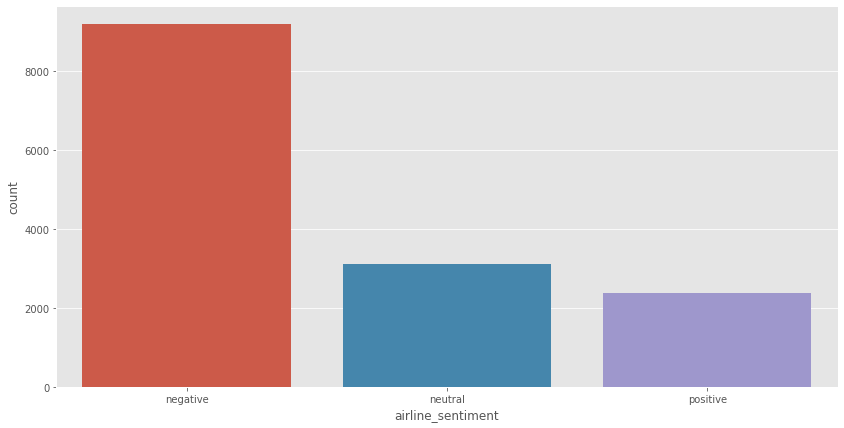

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(df['airline_sentiment'].sort_values())
plt.show()

most of the tweets are negative tweets 

# Negative Tweets Analysis

lets see which is the most negativereason 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


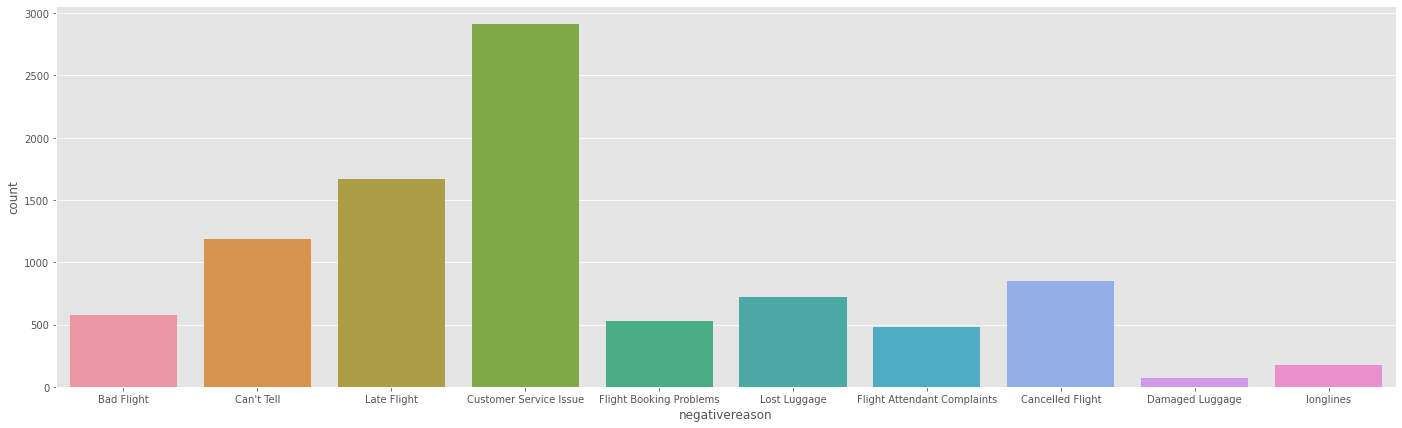

In [26]:
plt.figure(figsize=(24,7))
sns.countplot(df['negativereason'])
plt.show()

as we can see most of the issues came form customer service and late flights 

Airline Analysis 

In [27]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Data observations have 6 airlines 

In [28]:
print('num of tweets about every airline is: \n',df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

num of tweets about every airline is: 
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

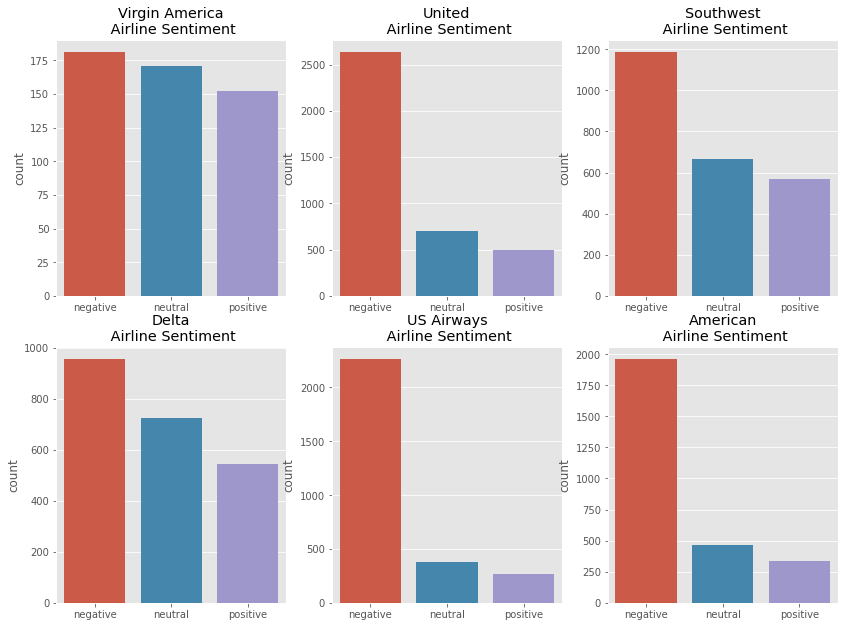

In [29]:
airlines= list(df.airline.unique())
plt.figure(1,figsize=(14,16))
for i in airlines:
  indices= airlines.index(i)
  plt.subplot(3,3,indices+1)
  nw_df=df[df['airline']==i]
  count=nw_df['airline_sentiment'].value_counts(ascending=False)
  Index=['negative','neutral','positive']
  ax=sns.barplot(Index,count)
  plt.ylabel('count')
  plt.title(i+'\n Airline Sentiment')

In [30]:
df.index.unique()

DatetimeIndex(['2015-02-24', '2015-02-23', '2015-02-22', '2015-02-21',
               '2015-02-20', '2015-02-19', '2015-02-18', '2015-02-17',
               '2015-02-16'],
              dtype='datetime64[ns]', name='date', freq=None)

we have 9 different days lets see the sentiment for each of them

In [31]:
print('num of Sentiment in each day is : \n',df.groupby('date')['airline_sentiment'].count().sort_values())

num of Sentiment in each day is : 
 date
2015-02-16       4
2015-02-18    1344
2015-02-24    1344
2015-02-19    1376
2015-02-17    1408
2015-02-20    1500
2015-02-21    1557
2015-02-23    3028
2015-02-22    3079
Name: airline_sentiment, dtype: int64


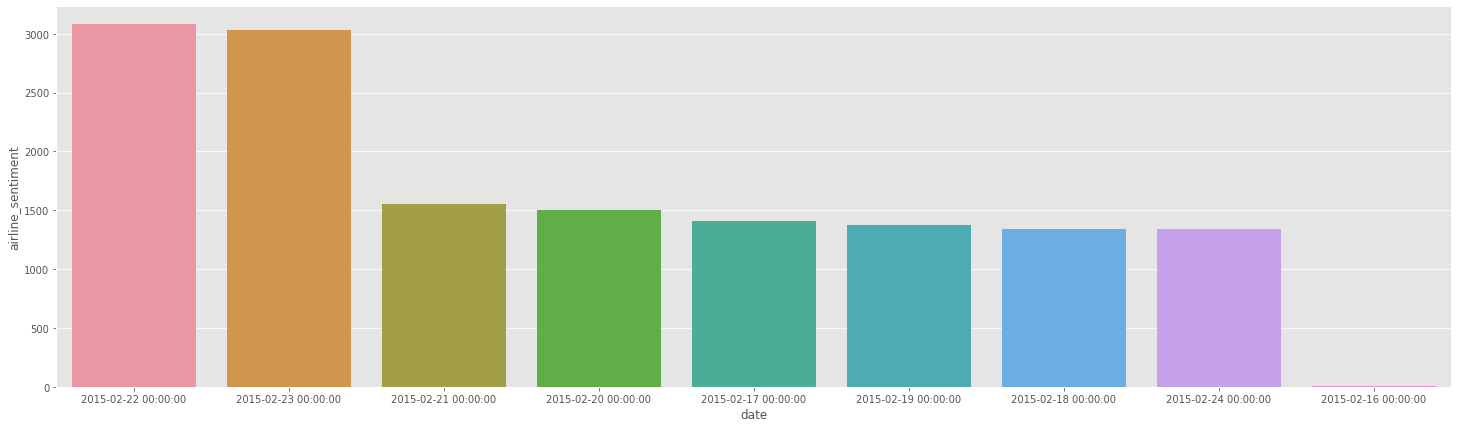

In [32]:
sentiment_num=df.groupby('date')['airline_sentiment'].count().sort_values(ascending=False).to_frame()
plt.figure(figsize=(25,7))
sns.barplot(data=sentiment_num,x=sentiment_num.index,y="airline_sentiment",ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

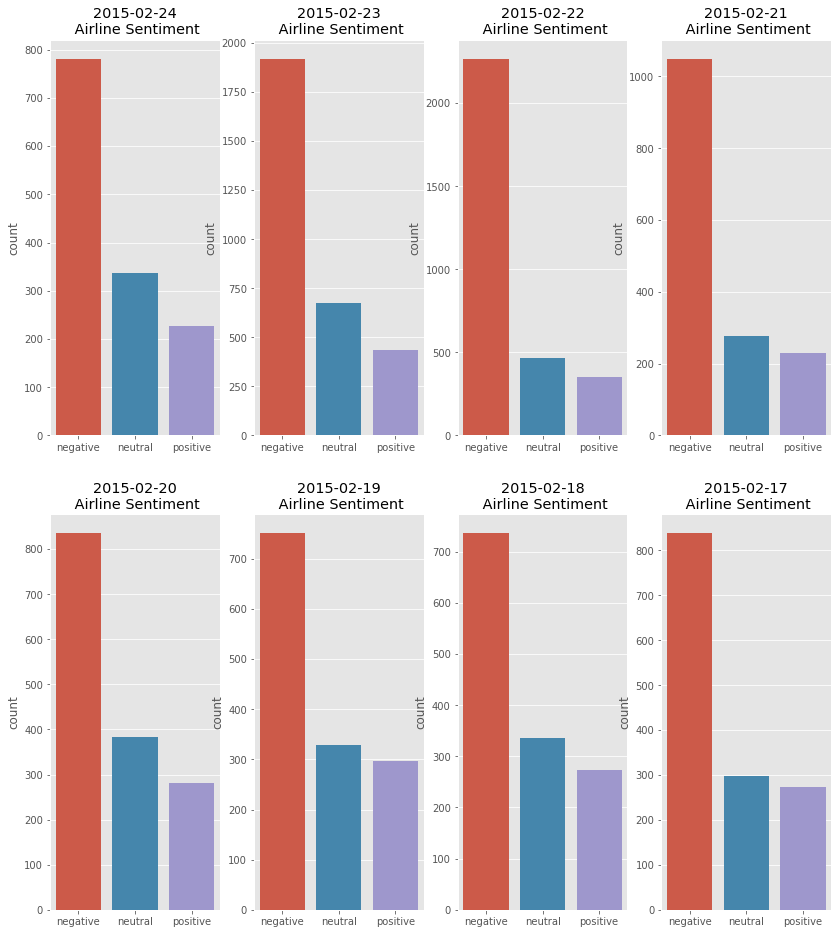

In [33]:
day=['2015-02-24', '2015-02-23', '2015-02-22', '2015-02-21',
     '2015-02-20', '2015-02-19', '2015-02-18', '2015-02-17']
# I will drop day 16 cause it have only 4 sentiments
plt.figure(1,figsize=(14,16))
for i in day:
  indices= day.index(i)
  plt.subplot(2,4,indices+1)
  nw_df=df[df.index ==i]
  count=nw_df['airline_sentiment'].value_counts(ascending=False)
  airline_sentiment=df.airline_sentiment.unique()
  Index=['negative','neutral','positive']
  sns.barplot(Index,count,ci=None)
  plt.ylabel('count')
  plt.title(i+'\n Airline Sentiment')

In [34]:
negative=round(((df[df['airline_sentiment']=="negative"].index.size)*100 / df.index.size),2)
positive=round(((df[df['airline_sentiment']=="positive"].index.size)*100 / df.index.size),2)
neutral=round(((df[df['airline_sentiment']=="neutral"].index.size)*100 / df.index.size),2)
print('the percentage of negative:',negative)
print('the percentage of positive:',positive)
print('the percentage of neutral:',neutral)

the percentage of negative: 62.69
the percentage of positive: 16.14
the percentage of neutral: 21.17


In [35]:
neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()
neg_tweets

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment_confidence, dtype: int64

            Percent Negative
American                1960
Delta                    955
Southwest               1186
US Airways              2263
United                  2633
Virgin                   181


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


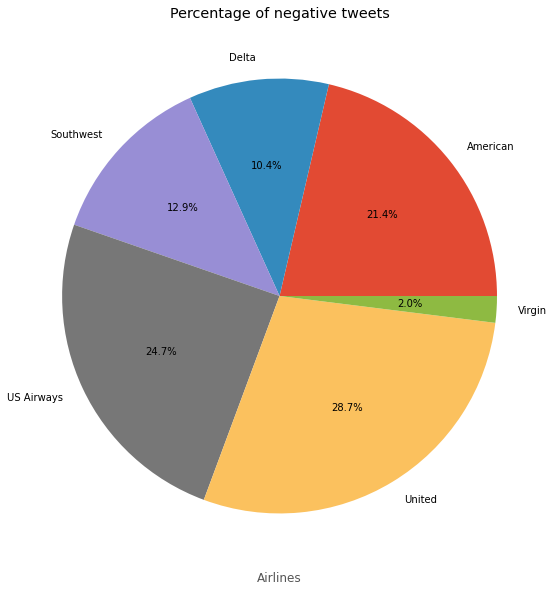

In [36]:
my_dict = {'American':(neg_tweets[0]),'Delta':(neg_tweets[3]),'Southwest': (neg_tweets[6]),
'US Airways': (neg_tweets[9]),'United': (neg_tweets[12]) ,'Virgin': (neg_tweets[15]) }
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
plt.figure(figsize=(15,10))
plt.pie(perc,labels=perc.index,autopct="%1.1f%%")
plt.xlabel('Airlines')
plt.title('Percentage of negative tweets')
plt.show()

            Percent Negative
American           71.040232
Delta              42.979298
Southwest          49.008264
US Airways         77.686234
United             68.890633
Virgin             35.912698


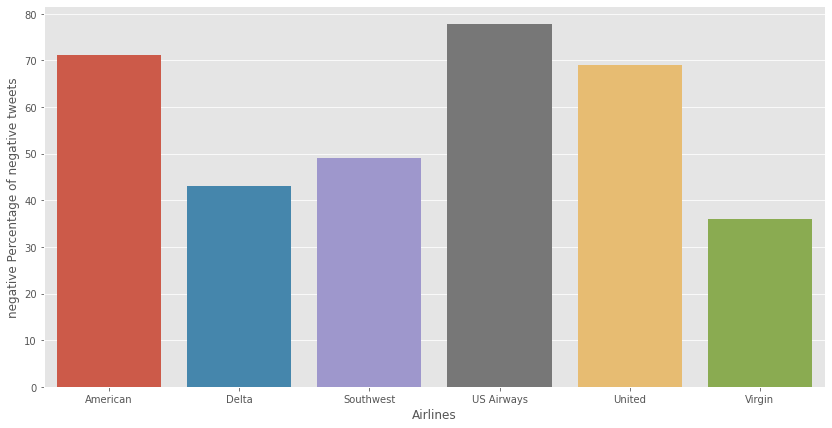

In [37]:
my_dict = {'American':(neg_tweets[0] / total_tweets[0])*100,'Delta':(neg_tweets[3] / total_tweets[1])*100,'Southwest': (neg_tweets[6] / total_tweets[2])*100,
'US Airways': (neg_tweets[9] / total_tweets[3])*100,'United': (neg_tweets[12] / total_tweets[4])*100,'Virgin': (neg_tweets[15] / total_tweets[5]*100)}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
plt.figure(figsize=(14,7))
ax=sns.barplot(data=perc,x=perc.index,y='Percent Negative')
plt.xlabel('Airlines')
plt.ylabel('negative Percentage of negative tweets')
plt.show()

1- all days the negative sentiment is the majority 62%.

2- flights on 2015-02-22 & 2015-02-23 have the most airline sentiment and most negative ones 

3- the percentage of neutral & positive sentiment on 2015-02-18 is the highest 

4- United airline have the most negative sentiment (over 2500)

5- Virgin America is the highest neutral & positive percentage of all of them

6-over 65% of the tweets about American ,United and Us airways are negative and they all combined took around 73% of the negative tweets and the other airline  share only the rest of the 27%

7- from first look and according to the percentages Virgin is the best Airline and US Airways Airline is the worest

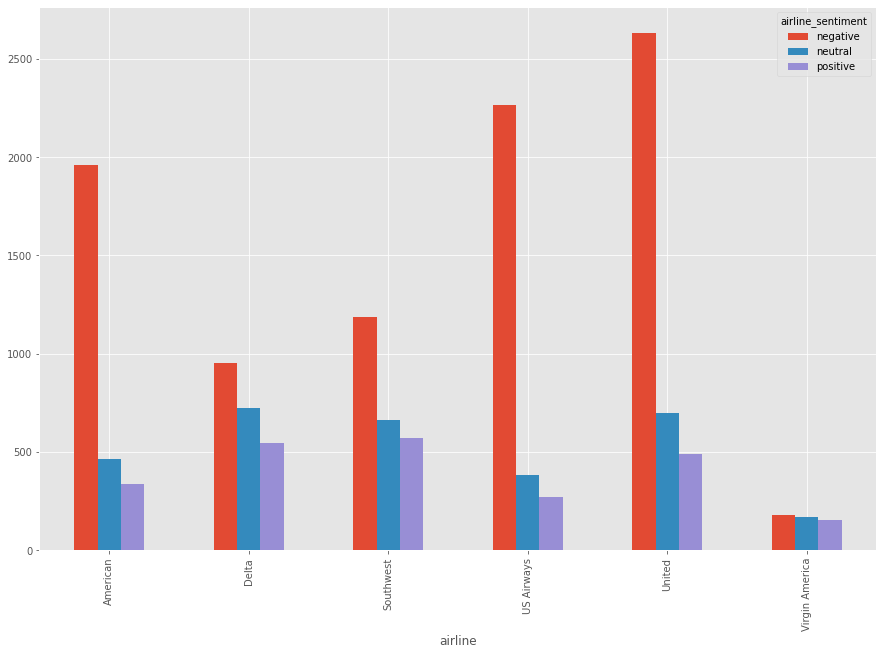

In [38]:
ax = df.groupby(['airline', 'airline_sentiment']).size()
ax.unstack().plot(kind='bar', figsize=(15,10))

now lets see what are reasons for negative sentimental tweets for each airline

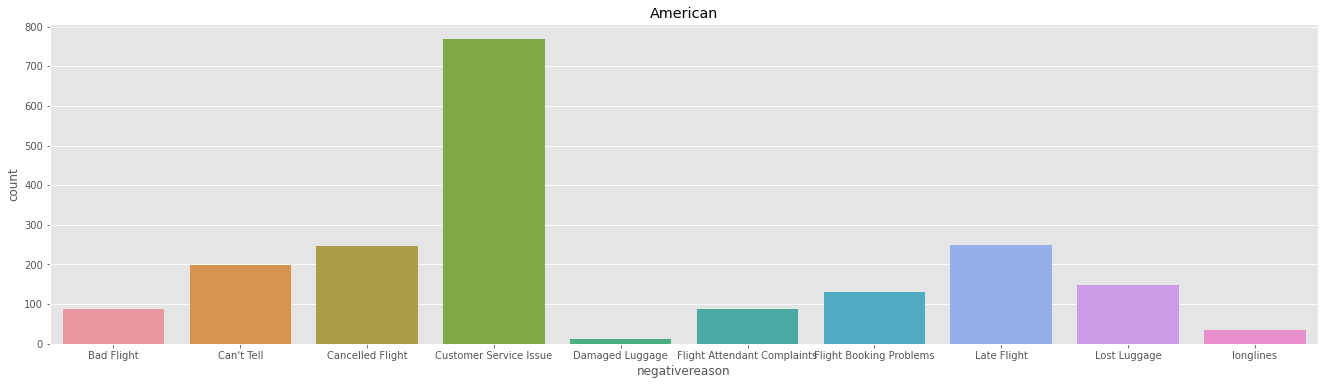

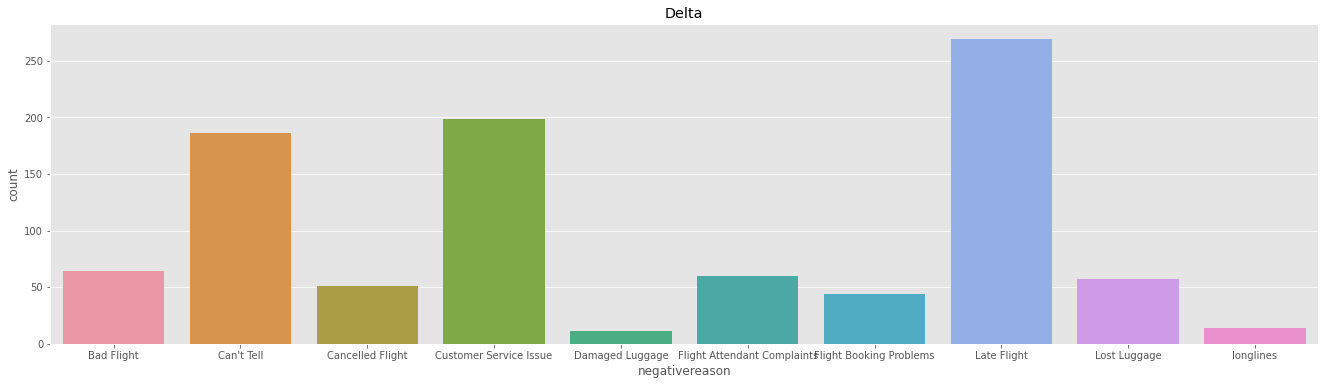

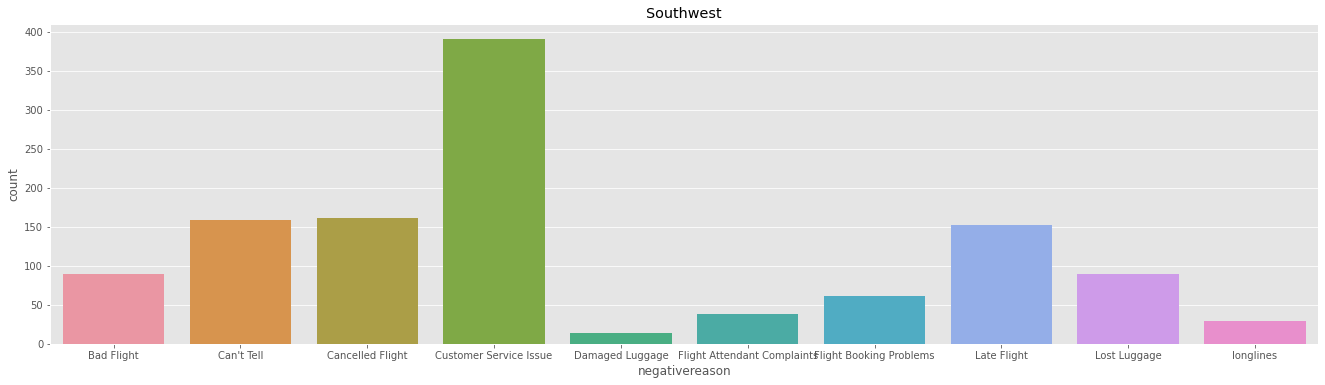

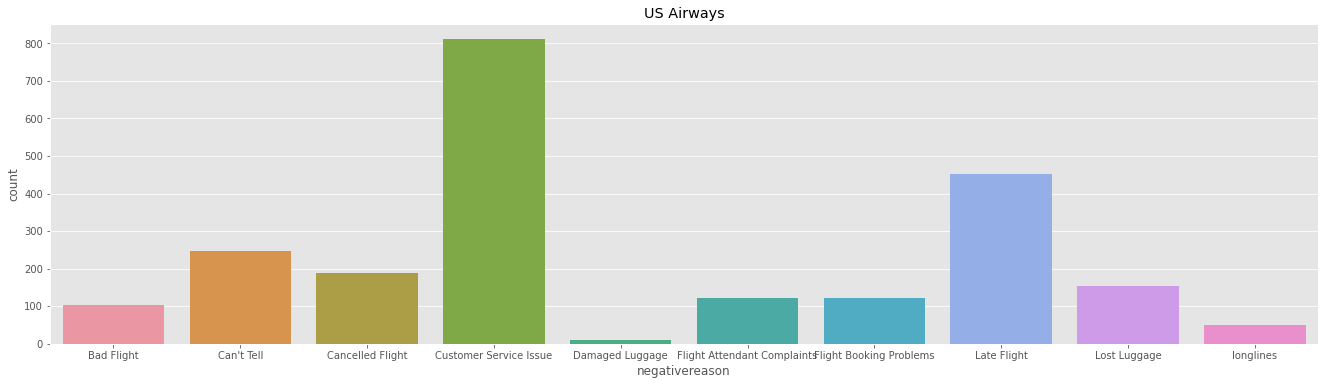

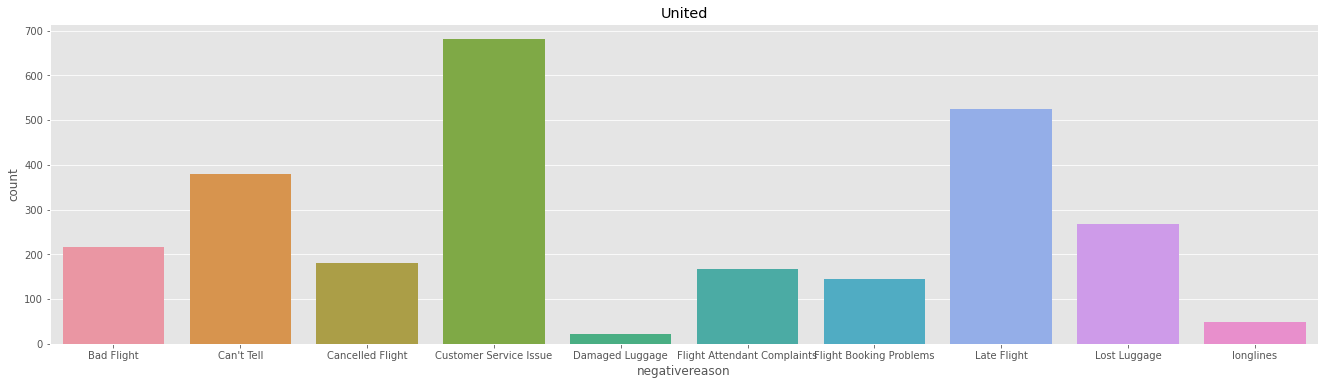

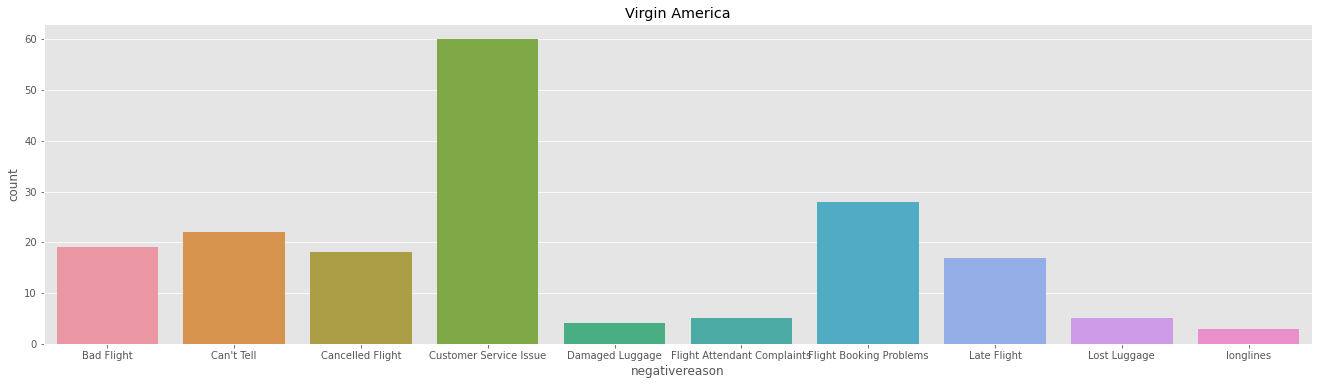

In [39]:
count=df.groupby(['negativereason','airline'])['negativereason'].count().to_frame()
count=count.unstack()
for i in list(count['negativereason']):
  plt.figure(figsize=(50,20))
  indices=0
  ax=plt.subplot(3,2,indices+1)
  ax=sns.barplot(data=count['negativereason'],x=count['negativereason'].index,y=count['negativereason'][i])
  plt.title(i)
  plt.ylabel('count')
  plt.show()

the main problem and complain it the customer serveice except who's major problem is late flights more than customer serveice and come in the second place late flights and damage luggage is the least negativereason to be complained

lets see in which days each airline get negativereason and its reasons 

In [40]:
count.head()

negativereason                                    \
airline                      American Delta Southwest US Airways United   
negativereason                                                            
Bad Flight                         87    64        90        104    216   
Can't Tell                        198   186       159        246    379   
Cancelled Flight                  246    51       162        189    181   
Customer Service Issue            768   199       391        811    681   
Damaged Luggage                    12    11        14         11     22   

                                       
airline                Virgin America  
negativereason                         
Bad Flight                         19  
Can't Tell                         22  
Cancelled Flight                   18  
Customer Service Issue             60  
Damaged Luggage                     4

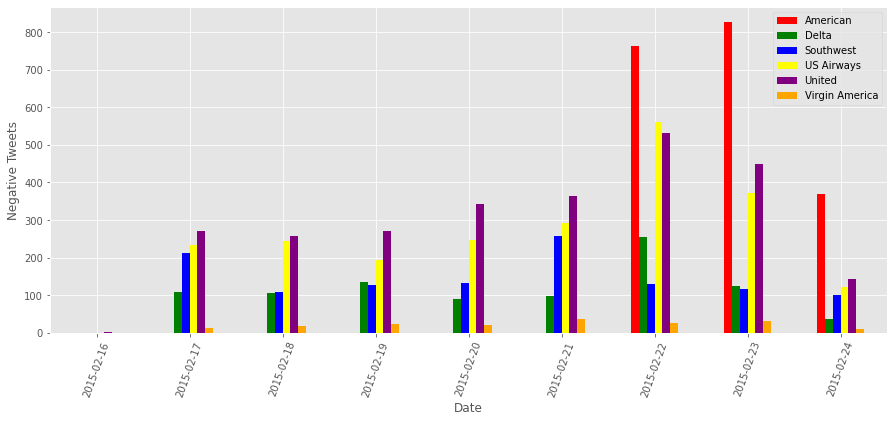

In [41]:
df=df.reset_index()
df.date = df.date.dt.date
day_df = df.groupby(['date','airline','airline_sentiment']).size()
day_df = day_df.loc(axis=0)[:,:,'negative']
ax2 = day_df.groupby(['date','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

this plot shows that the American airline negative tweets starts only from day 22-02-2015 and before that they didn't have any proplem('according the negative tweets') so its a new thing may be temporary problem mostly caused by the Customer serveies and fixing this problem should make things back to normal 


United and US Airlines are consistently getting negative tweets so its an old proplem and it's cause alot of things mostly(Customer serveies,late fights) so they should fixs these two first 

Delta and Virgin Amarica are the least to get negative tweets on the last day(24-02-2015) and it seems they fixed there problems especially Delta which its negative tweets are significantly redused over time

In [42]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [43]:
from wordcloud import WordCloud,STOPWORDS

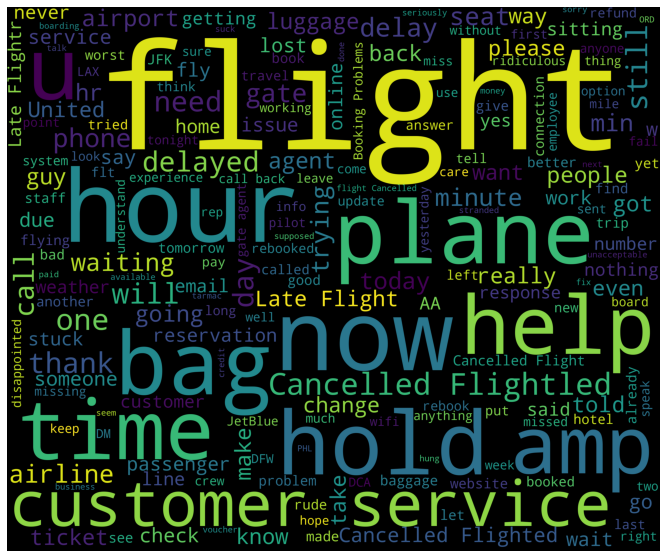

In [44]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

some of the words have double meaning but like plane,flight,customer servive,etc
but the are in negative tweets so we will take them the negative way 

we can see that flight is the most freq word but if dosen't mean anything (because is airlines tweets so the most likely to have flight in the tweets)but it may represent bad fligt in genral

we can see also that the late flights whether was delayed or canceled


and also there is a plane and seats problems and may be bag and luggage damage or lose 

# Postive Tweets Analysis
the majorty of the tweets were negative but there where also postive tweets lets see it's reasons  

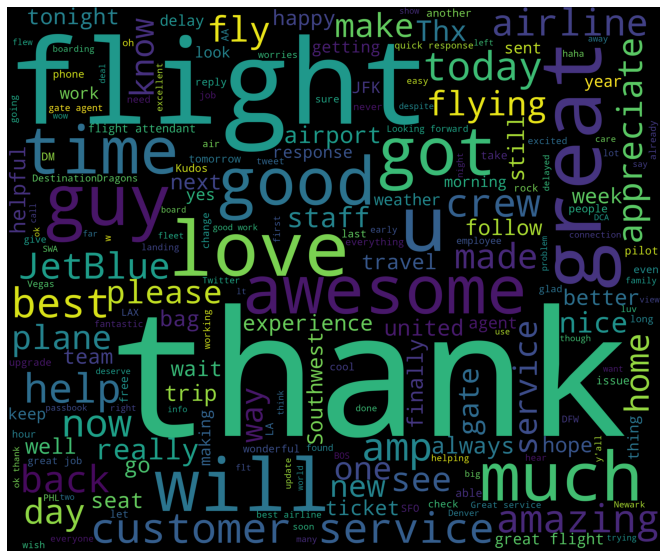

In [45]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [46]:
# we dont need the neutral tweets so I will drop them
df.drop(df.loc[df['airline_sentiment']=='neutral'].index,inplace=True)

**endcoding airline_sentiment**

In [48]:
from sklearn.preprocessing import LabelEncoder

endcoder = LabelEncoder()
df['airline_sentiment_encoded'] = endcoder.fit_transform(df['airline_sentiment'])
df.head()

,date,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location,user_timezone,airline_sentiment_encoded
1,2015-02-24,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,Pacific Time (US & Canada),1
3,2015-02-24,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,Pacific Time (US & Canada),0
4,2015-02-24,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,Pacific Time (US & Canada),0
5,2015-02-24,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,Pacific Time (US & Canada),0
6,2015-02-24,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",San Francisco CA,Pacific Time (US & Canada),1


#tweets cleaning

In [53]:
import re
import nltk
from nltk.corpus import stopwords

def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [57]:
nltk.download('stopwords')
df['text']=df['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


now we have the tweets only without the symbols

**splting the data**

In [139]:
X=df['text']
y=df['airline_sentiment']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Victorzing text so it can be trained with TfidfVectorizer**

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect.fit(X_train)

TfidfVectorizer()

In [142]:
X_train=vect.transform(X_train)
X_test=vect.transform(X_test)

#Modeling

In [150]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 42)
model.fit(X_train, y_train)
#predicting output for test data
pred = model.predict(X_test)

In [148]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.figure(figsize = (25,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize = 30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label',fontsize = 20)
    plt.xlabel('Predicted label',fontsize = 20)
    plt.show()

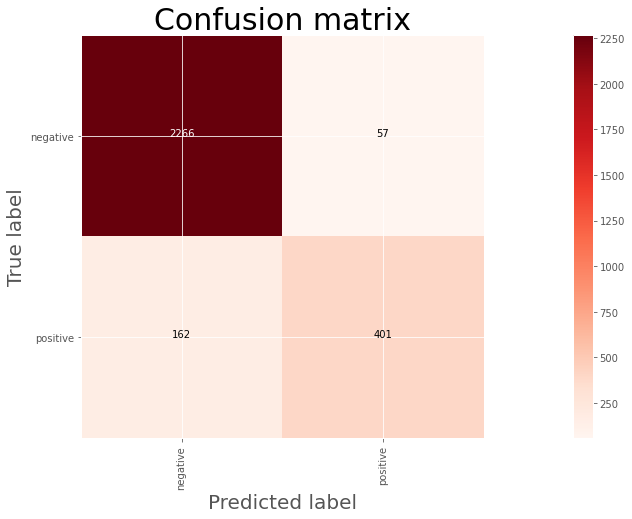


 Accuracy Score is: 0.9241164241164241

               precision    recall  f1-score   support

    negative       0.93      0.98      0.95      2323
    positive       0.88      0.71      0.79       563

    accuracy                           0.92      2886
   macro avg       0.90      0.84      0.87      2886
weighted avg       0.92      0.92      0.92      2886



In [157]:
cm=confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['negative','positive'])
print('\n','Accuracy Score is:',accuracy_score(y_test,pred))
print('\n',classification_report(y_test,pred))